# Lemon Project - Basic Model  

Raw images are 1056 x 1056 pixels
Need to make them a bit smaller to avoid having 1,115,136 input neurons! haha
The output of the model will have just 2 categories - healthy and unhealthy

In [1]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import image
import os

In [2]:
test_img = image.imread("lemon_sample/healthy/0002_C_V_120_G.jpg")

In [3]:
test_img1 = image.imread(f"../raw_data/images/0002_C_V_120_G.jpg")

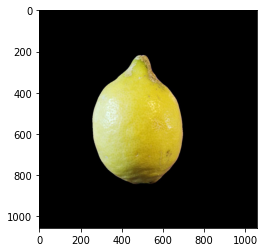

In [4]:
 plt.imshow((test_img1))

In [5]:
from PIL import Image
import numpy as np

img = np.array(Image.open('lemon_sample/healthy/0002_C_V_120_G.jpg'))

def strip_black_from_image(img):

    x_id = np.argwhere(np.max(img, axis = (1, 2)) > 0).reshape(-1)

    strip_img = img[x_id]
    
    y_id = np.argwhere(np.max(strip_img, axis = (0, 2)) > 0).reshape(-1)

    return strip_img[:, y_id]

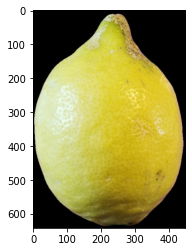

In [6]:
 plt.imshow(strip_black_from_image(test_img))

In [7]:
# img_shape = np.shape(test_img)
# img_shape

In [8]:
# plt.imshow(test_img)

In [9]:
# Use this method to quickly read small numbers of images
# filepath = os.listdir('lemon_sample/healthy/healthy')
# data = []
# for file in filepath:
#     data.append(image.imread(f'lemon_sample/healthy/{file}'))

In [10]:
# plt.imshow(data[0])

In [11]:
# Use this method to prepare a data set for use in a model - only reads the images on when needed
# Returns a tf.data.Dataset object

from tensorflow.keras import utils

# data = utils.image_dataset_from_directory('lemon_sample')

2022-08-11 19:07:31.031980: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-11 19:07:31.032397: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [12]:
train_data = utils.image_dataset_from_directory('../raw_data/Test_lemon', seed = 1,validation_split = 0.2, subset = 'training')
validation_data = utils.image_dataset_from_directory('../raw_data/Test_lemon', seed =1, validation_split = 0.2, subset = 'validation')

Found 807 files belonging to 2 classes.
Using 646 files for training.


2022-08-11 19:07:37.754384: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-11 19:07:37.755011: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-11 19:07:37.755841: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-FIJER02): /proc/driver/nvidia/version does not exist
2022-08-11 19:07:37.762800: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 807 files belonging to 2 classes.
Using 161 files for validation.


In [13]:
# data.__dict__


In [14]:
# data.keys()

## Convolutional Neural Network (CNN)

### Dimensionality

In [15]:
from tensorflow.keras.backend import expand_dims
# from tensorflow.keras import layers
# from tensorflow.keras import models

In [16]:
# X_train[0].shape

In [17]:
# X_train = expand_dims(X_train)
# X_train.shape

In [18]:
# X_test = expand_dims(X_test)
# X_test.shape

### Label Encoding

**Not sure if we need this section 

In [19]:
# from tensorflow.keras.utils import to_categorical

# y_train_cat = to_categorical(y_train, num_classes=2)
# y_test_cat = to_categorical(y_test, num_classes=2)

### Basic CNN

In [20]:
from tensorflow.keras import layers, models, optimizers, losses, metrics
# from tensorflow.keras import models

In [21]:
def initialize_model():

    model = models.Sequential()
    
    ### Resizing layer before Model
    model.add(layers.Resizing(128,128, input_shape=(256, 256, 3)))

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(8, (28,28), activation='relu', padding='same', input_shape=(128,128, 3)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ## Extra Layers just for fun ##
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ### Flattening
    model.add(layers.Flatten())
    
    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10, activation='relu'))
    
    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(1, activation='sigmoid'))
    
    ### Model compilation
    model.compile(loss='binary_crossentropy',  #'sparse_categorical_crossentropy'
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [22]:
# Optimizer
# optimizer = optimizers.Adam(
#     learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,
#     name='Nadam')
    

In [23]:
# Loss Function
# lossfn = losses.SparseCategoricalCrossentropy( from_logits=False, reduction=losses.Reduction.AUTO, name='sparse_categorical_crossentropy')

In [24]:
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', metrics.CategoricalAccuracy()])

In [25]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 8)       18824     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        9

### Train The Model

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
## model = initialize_model()

es = EarlyStopping()

histroy = model.fit(train_data, 
          batch_size=2, 
          epochs=5,
          validation_data = validation_data
          )

          
# callbacks=[es],verbose = 1,

Epoch 1/5
21/21 [==============================] - 254s 12s/step - loss: 1.2124 - accuracy: 0.6734 - val_loss: 0.6895 - val_accuracy: 0.7640
Epoch 2/5
21/21 [==============================] - 175s 8s/step - loss: 0.6881 - accuracy: 0.7322 - val_loss: 0.6850 - val_accuracy: 0.7640
Epoch 3/5
21/21 [==============================] - 160s 8s/step - loss: 0.6840 - accuracy: 0.7322 - val_loss: 0.6803 - val_accuracy: 0.7640
Epoch 4/5
21/21 [==============================] - 174s 8s/step - loss: 0.6799 - accuracy: 0.7322 - val_loss: 0.6758 - val_accuracy: 0.7640
Epoch 5/5
21/21 [==============================] - 169s 8s/step - loss: 0.6762 - accuracy: 0.7322 - val_loss: 0.6713 - val_accuracy: 0.7640


### Evaluate The Model

In [28]:
print(model.evaluate(train_data, verbose=0))

[0.6740369200706482, 0.7321981191635132]


In [29]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

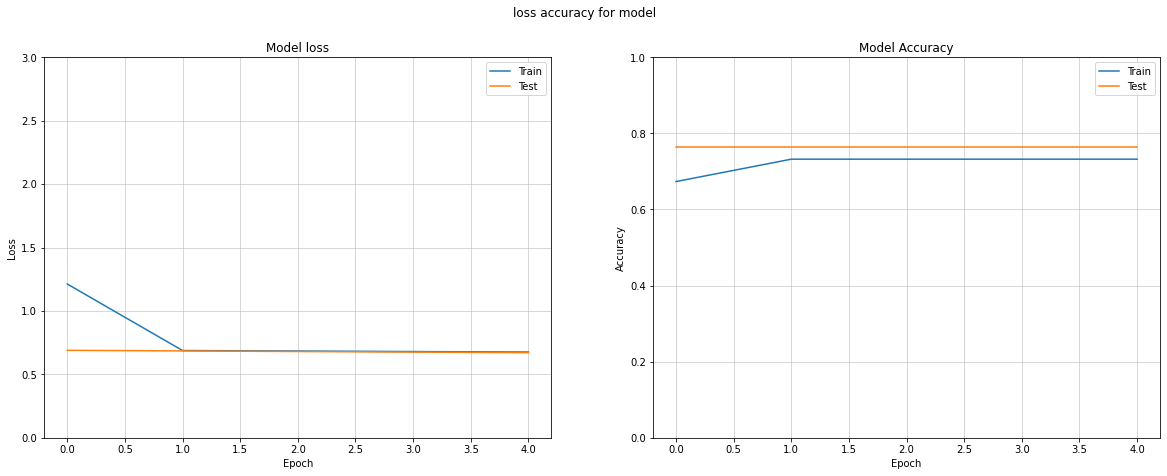

In [30]:
plot_loss_accuracy(histroy, title="loss accuracy for model")

In [31]:
weights = model.get_weights()
model_kernel = weights[0][0][0]

In [32]:
model_kernel


array([[ 0.01046542,  0.00606491, -0.00977674, -0.02669775, -0.00926751,
         0.01152689,  0.01236696, -0.00820328],
       [ 0.01187262, -0.0252964 ,  0.01259433,  0.01819976, -0.00884381,
         0.02044315, -0.02343163,  0.00590228],
       [-0.01676049,  0.00334229,  0.00308344, -0.00491726, -0.01827907,
        -0.03309353,  0.01657098,  0.02884041]], dtype=float32)

In [40]:
models.save_model(model, 'basic_model_02')

2022-08-11 19:25:36.331898: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: basic_model_02/assets


In [41]:
pwd

'/home/loulet/code/LouiseAyre/lemon_project/notebooks'

In [33]:
ti1 = expand_dims(test_img1, axis=0)

In [34]:
ti1.shape

TensorShape([1, 1056, 1056, 3])

In [35]:
model.predict(train_data)

array([[0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],
       [0.5215643],


In [36]:
# Add class weights to model.fit function

In [37]:
# tensorflow resize function  

In [38]:
# recreate date with correct random seed (2)

In [39]:
# lemon_model = model.save